In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os, sys
import re
import time

In [2]:
path2data = "/Users/justinreynolds/Desktop/21summer/p0/data/"
path2images = "/Users/justinreynolds/Desktop/21summer/p0/Cropped_Epidural_Distance_Measurement/"
path2processeddata = "/Users/justinreynolds/Desktop/21summer/p0/Epidural/processed_data/"
#export_filename = "proc_data_nz_20210531.csv"
exp_images = "export_nz_images_1D_20210607.npy"
exp_imagefilenames = "export_nz_names_20210607.npy"
exp_distances = "export_nz_distances_20210607.npy"
exp_eid = "export_nz_eid_20210607.npy"

In [3]:
Names = ['sid', 'pixelCount', 'distance']
E1_book = pd.read_excel(path2data+"E1_Labeled Data.xlsx", sheet_name=None, header=None, names=Names)
E2_book = pd.read_excel(path2data+'E2_Labeled Data.xlsx', sheet_name=None, header=None, names=Names)
E3_book = pd.read_excel(path2data+'E3_Labeled Data.xlsx', sheet_name=None, header=None, names=Names)
E4_book = pd.read_excel(path2data+'E4_Labeled Data.xlsx', sheet_name=None, header=None, names=Names)
E5_book = pd.read_excel(path2data+'E5_Labeled Data.xlsx', sheet_name=None, header=None, names=Names)
E6_book = pd.read_excel(path2data+'E6_Labeled Data.xlsx', sheet_name=None, header=None, names=Names)
E7_book = pd.read_excel(path2data+'E7_Labeled Data.xlsx', sheet_name=None, header=None, names=Names)
E8_book = pd.read_excel(path2data+'E8_Labeled Data.xlsx', sheet_name=None, header=None, names=Names)

In [4]:
E_dict = {
    '1': E1_book, 
    '2': E2_book,
    '3': E3_book, 
    '4': E4_book, 
    '5': E5_book, 
    '6': E6_book, 
    '7': E7_book, 
    '8': E8_book
}

In [5]:
data_dict = {}
for book in E_dict:
    thisdf = E_dict[book]
    my_dict = {}
    for sheet in thisdf:
        isid = thisdf[sheet]['sid']
        idist = thisdf[sheet]['distance']
        temp_dict = {isid[i]: idist[i] for i in range(len(isid))}
        my_dict[sheet] = temp_dict
    data_dict[book] = my_dict

In [6]:
dirs = os.listdir(path2images)
dirs

['E8_Labeled Data.xlsx',
 'E5_Distance_Measurement_cropped',
 'E6_Distance_Measurement_cropped',
 'E8_Distance_Measurement_cropped',
 'E3_Distance_Measurement_cropped',
 'E7_Labeled Data.xlsx',
 'E2_Distance_Measurement_cropped',
 'E2_Labeled Data.xlsx',
 'EpiduralDistanceRegressionData.zip',
 'E6_Labeled Data.xlsx',
 'E3_Labeled Data.xlsx',
 'E1_Distance_Measurement_cropped',
 'E5_Labeled Data.xlsx',
 'E7_Distance_Measurement_cropped',
 'E4_Labeled Data.xlsx',
 'E4_Distance_Measurement_cropped',
 'E1_Labeled Data.xlsx']

In [7]:
l_folders = [] 
for item in dirs:
    print(item)
    temp_dir = path2images + item
    if os.path.isdir(temp_dir):
        subdirs = os.listdir(temp_dir)
        for subitem in subdirs:
            l_folders.append(temp_dir + "/" +subitem)
            print("\t", subitem)

E8_Labeled Data.xlsx
E5_Distance_Measurement_cropped
	 E5_Distance_Measurement_2.0mm
	 E5_Distance_Measurement_0.0mm
	 E5_Distance_Measurement_1.0mm
	 E5_Distance_Measurement_1.5mm
	 E5_Distance_Measurement_0.5mm
	 E5_Distance_Measurement_2.5mm
E6_Distance_Measurement_cropped
	 E6_Distance_Measurement_0.5mm
	 E6_Distance_Measurement_1.5mm
	 E6_Distance_Measurement_2.5mm
	 E6_Distance_Measurement_2.0mm
	 E6_Distance_Measurement_1.0mm
	 E6_Distance_Measurement_0.0mm
E8_Distance_Measurement_cropped
	 E8_Distance_Measurement_2.0mm
	 E8_Distance_Measurement_0.0mm
	 E8_Distance_Measurement_1.0mm
	 E8_Distance_Measurement_1.5mm
	 E8_Distance_Measurement_0.5mm
	 E8_Distance_Measurement_2.5mm
E3_Distance_Measurement_cropped
	 E3_Distance_Measurement_1.0mm
	 E3_Distance_Measurement_0.0mm
	 E3_Distance_Measurement_2.0mm
	 E3_Distance_Measurement_2.5mm
	 E3_Distance_Measurement_0.5mm
	 E3_Distance_Measurement_1.5mm
E7_Labeled Data.xlsx
E2_Distance_Measurement_cropped
	 E2_Distance_Measurement_1.0m

## Sample image

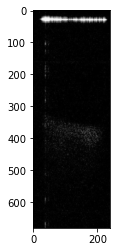

In [8]:
img = mpimg.imread(path2images+'E3_Distance_Measurement_cropped/E3_Distance_Measurement_2.0mm/'+'403_e3_Distance_2.0mm.jpg', format = "jpg") 
plt.imshow(img) 

## Map images to Excel data (include images with 0.0 distance)

In [9]:
include_zero_flag = False
MasterDict = {}
images_raw = []
image_names = []
precise_dist = []
precise_dist_with_0s = []
image_eid = []
r_sid = re.compile(r'\d+(?=_e[0-9]+)')
r_eid = re.compile(r'(?<=e)[0-9]+')
r_aprxdist = re.compile(r'\d.\d(?=mm)')
r_dimdata = re.compile(r'\d.\d(?=mm)')

start = time.time()

count = 0
for item in l_folders:
    file_dir_temp = os.listdir(item)
    # loop through dirs for E1, E2, E3, E4, E5, E6, and E7
    for item_list in file_dir_temp:
        # get full path to image
        path_img = item + "/" + item_list
        # get the sequence id from the image filename
        res_sid = r_sid.search(item_list)
        # get the the eid (e1, e2, ..., e7) from the image filename
        res_eid = r_eid.search(item_list)
        # get the distance provided by the image filename. 
        res_aprxdist = r_aprxdist.search(item_list)
        # read the image with matplotlib mpimg
        img = mpimg.imread(path_img, format = "jpg")
        # convert 3D image to 1D (disregard pseudocolor)
        img_1D = img[:,:,0]
        # find the data entry in the Excel files corresponding to this image (if it exists)
        for eid in data_dict:
            if res_eid.group(0) == eid:
                for dim in data_dict[eid]:
                    res_dimdata = r_dimdata.search(dim)
                    if res_aprxdist.group(0) == res_dimdata.group(0):
                        for sid in data_dict[eid][dim]:
                            if int(res_sid.group(0)) == int(sid):
                                MasterDict[item_list] = (res_eid.group(0), 
                                                         int(res_sid.group(0)), 
                                                         float(res_aprxdist.group(0)),
                                                         img_1D, 
                                                         data_dict[res_eid.group(0)][res_aprxdist.group(0)+'mm'][int(res_sid.group(0))])
                                image_eid.append(int(res_eid.group(0)))
                                image_names.append(item_list)
                                images_raw.append(img)
                                precise_dist.append(data_dict[res_eid.group(0)][res_aprxdist.group(0)+'mm'][int(res_sid.group(0))])
                    elif include_zero_flag and (float(res_aprxdist.group(0)) == 0.0):
                        MasterDict[item_list] = (
                            res_eid.group(0), 
                            int(res_sid.group(0)), 
                            float(res_aprxdist.group(0)),
                            img_1D, 
                            0.0)
                        image_eid.append(int(res_eid.group(0)))
                        image_names.append(item_list)
                        images_raw.append(img)
                        precise_dist.append(0.0)
                        break           
        count += 1
        if count % 1000 == 0:
            print("completed images =", count)
            
end = time.time()
print("Time taken to read", len(MasterDict), " images:", end - start, "s")

completed images = 1000
completed images = 2000
completed images = 3000
completed images = 4000
completed images = 5000
completed images = 6000
completed images = 7000
completed images = 8000
completed images = 9000
completed images = 10000
completed images = 11000
completed images = 12000
completed images = 13000
completed images = 14000
completed images = 15000
completed images = 16000
completed images = 17000
completed images = 18000
completed images = 19000
completed images = 20000
completed images = 21000
completed images = 22000
completed images = 23000
completed images = 24000
completed images = 25000
completed images = 26000
completed images = 27000
completed images = 28000
Time taken to read 24000  images: 73.46219801902771 s


In [10]:
print("including images with 0 distance?", include_zero_flag)
print("number of images:", len(images_raw))

including images with 0 distance? False
number of images: 24000


In [11]:
images_raw[100].shape

(681, 241, 3)

In [12]:
image_names[100]

'063_e5_Distance_2.0mm.jpg'

## Transform images -- channels last

In [13]:
# convert list of images to 1D - "Channels Last"
images_1D = [i[:,:,0] for i in images_raw]
len(images_1D)

24000

In [14]:
images_1D[100].shape

(681, 241)

In [ ]:
images_1D_arr = np.array(images_1D)

In [ ]:
images_1D_arr.shape

In [ ]:
images_1D_arr[100].shape

## Export binaries

In [ ]:
with open(path2processeddata+exp_images, 'wb') as f:
    np.save(f, images_1D_arr)

with open(path2processeddata+exp_imagefilenames, 'wb') as f:
    np.save(f, image_names)

with open(path2processeddata+exp_distances, 'wb') as f:
    np.save(f, precise_dist)
    
with open(path2processeddata+exp_eid, 'wb') as f:
    np.save(f, image_eid)

In [ ]:
eid_unique = np.unique(image_eid)
eid_unique

In [ ]:
print(MasterDict['470_e2_Distance_0.5mm.jpg'])

In [ ]:
idx = 1220
print("name: ", image_names[idx])
print("eid:  ", image_eid[idx])
print("shape:", images_1D_arr[idx].shape)
print("dist: ", precise_dist[idx])

plt.imshow(images_1D_arr[idx], interpolation='nearest')
plt.show()

In [ ]:
img = mpimg.imread(path2images+'E2_Distance_Measurement_cropped/E2_Distance_Measurement_0.0mm/'+'470_e2_Distance_0.0mm.jpg', format = "jpg") 
plt.imshow(img)